# Librerias
---

## Librerías Estándar

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,9)
plt.style.use("ggplot")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler   #Normalización y estandarización de datos con minimo y maximo
from sklearn.model_selection import train_test_split

## Librerias Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Librerías Árbol de Decisión

In [ ]:
from sklearn import tree

## Librerías KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Librerías SVM

In [ ]:
from sklearn.svm import SVC

## Librerías Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

## Naive-Bayes Gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Análisis Exploratorio
---

## Importando Data set

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_excel("/content/drive/MyDrive/Mineria_de_datos_equipo/Parcial2_EfectoFotoelectrico/datos.xls")
df

,Intensidad,Filtro,Voltaje,Corriente nA
0,Máxima,546nm,4.000,2600.0
1,Máxima,546nm,3.500,2300.0
2,Máxima,546nm,3.000,1900.0
3,Máxima,546nm,2.500,1500.0
4,Máxima,546nm,2.100,1200.0
...,...,...,...,...
76,Maxima,405nm,-2.000,-17.0
77,Maxima,405nm,-2.496,-17.0
78,Maxima,405nm,-3.005,-18.0
79,Maxima,405nm,-3.503,-19.0


## Descripción del dataset

In [ ]:
df.describe()
print(df.columns)

Index(['Intensidad', 'Filtro', 'Voltaje  ', 'Corriente nA'], dtype='object')


In [ ]:
print(df.groupby("Filtro").size())

Filtro
405nm    31
436nm    19
546nm    31
dtype: int64


In [ ]:
print(df.groupby("Intensidad").size())

Intensidad
Maxima    50
Máxima    31
dtype: int64


In [ ]:
# Cambio de valor categórico a numérico en el df
df["Intensidad"] = df["Intensidad"].apply(lambda x: 1 if x in ["Maxima", "Máxima"] else 0)
df

,Intensidad,Filtro,Voltaje,Corriente nA
0,1,546nm,4.000,2600.0
1,1,546nm,3.500,2300.0
2,1,546nm,3.000,1900.0
3,1,546nm,2.500,1500.0
4,1,546nm,2.100,1200.0
...,...,...,...,...
76,1,405nm,-2.000,-17.0
77,1,405nm,-2.496,-17.0
78,1,405nm,-3.005,-18.0
79,1,405nm,-3.503,-19.0


In [ ]:
print(df.groupby("Intensidad").size())

Intensidad
1    81
dtype: int64


In [ ]:
df["Filtro"] = df["Filtro"].str.replace('nm', '').astype(int)
df

,Intensidad,Filtro,Voltaje,Corriente nA
0,1,546,4.000,2600.0
1,1,546,3.500,2300.0
2,1,546,3.000,1900.0
3,1,546,2.500,1500.0
4,1,546,2.100,1200.0
...,...,...,...,...
76,1,405,-2.000,-17.0
77,1,405,-2.496,-17.0
78,1,405,-3.005,-18.0
79,1,405,-3.503,-19.0


In [ ]:
print(df.groupby("Filtro").size())

Filtro
405    31
436    19
546    31
dtype: int64


<Axes: xlabel='Filtro', ylabel='count'>

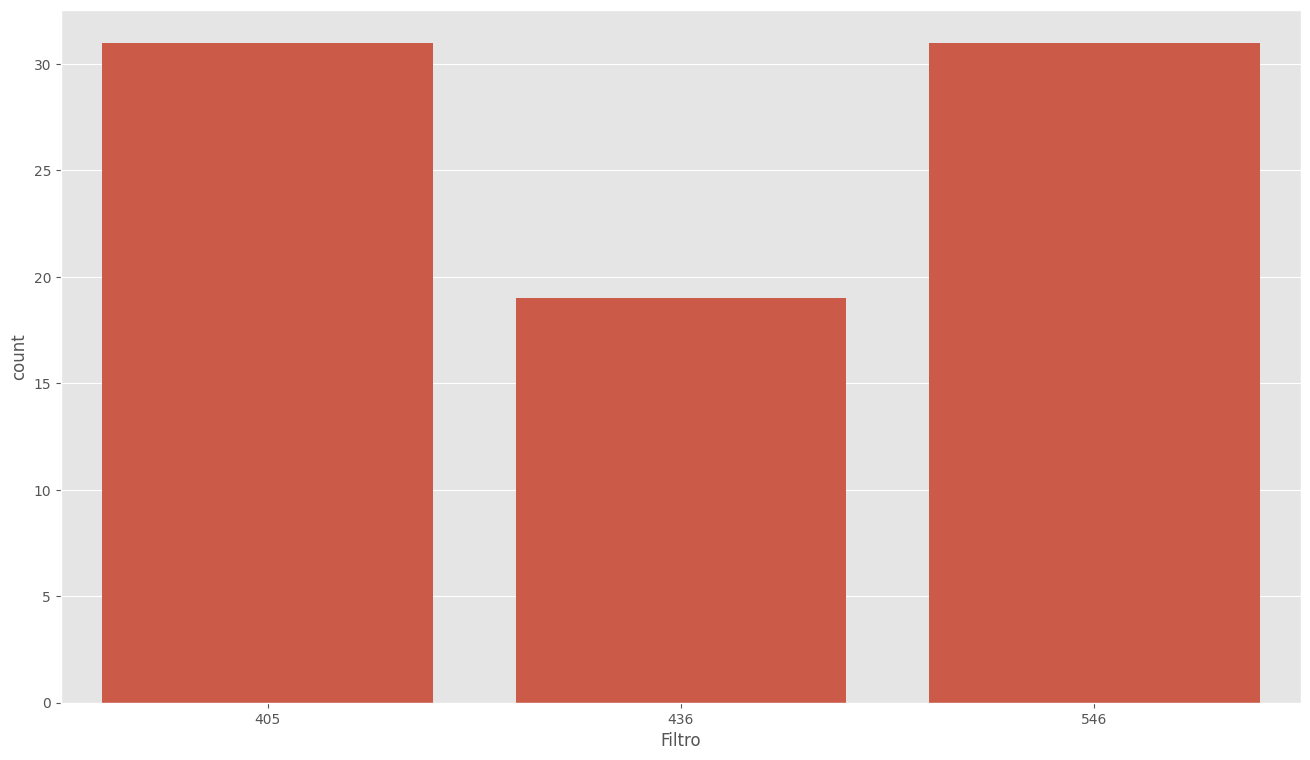

In [ ]:
sb.countplot(x = "Filtro", data = df)

<Axes: >

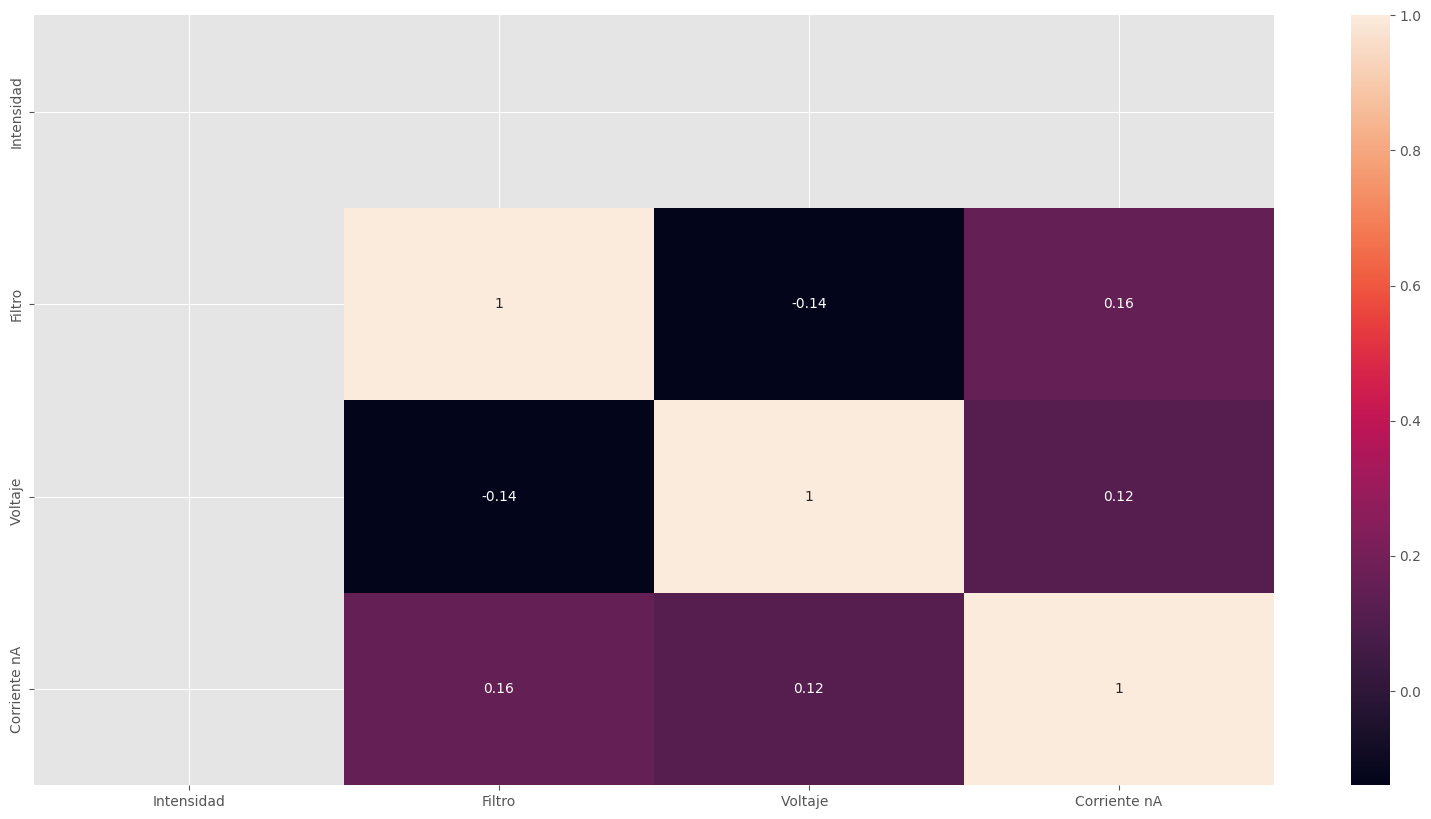

In [ ]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(),  annot=True)

## Pre-procesamiento

In [ ]:
X = df[["Voltaje  ","Corriente nA"]].values
y = df["Filtro"].values

#Escalado y normalización a los datos

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
print(df.groupby("Filtro").size())

Filtro
405    31
436    19
546    31
dtype: int64


## División de train-test simple y balanceando

División de train y test simple

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

División train y test con sobremuestreo

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_balanceado, y_balanceado = oversampler.fit_resample(X,y)

#division train and test
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_balanceado, y_balanceado, test_size=0.2, random_state=42)

División train y test con submuestreo

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(random_state=42)
X_balanceado_2, y_balanceado_2=undersampler.fit_resample(X,y)

#division train and test
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_balanceado_2, y_balanceado_2, test_size=0.2, random_state=42)

# Modelos Simples
---

## Regresión Logística

In [ ]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for sol in solver:
  modelo = LogisticRegression(solver = sol).fit(X_train, y_train)
  pred = modelo.predict(X_test)

  print("-------------------------------------------")
  print("Modelo con el solver: ", sol)
  print(f"Acurracy de entrenamiento: {modelo.score(X_train, y_train)}")
  print(f"Acurracy de test:{modelo.score(X_test, y_test)}")
  print(classification_report(y_test,pred))
  print("-------------------------------------------")

-------------------------------------------
Modelo con el solver:  lbfgs
Acurracy de entrenamiento: 0.484375
Acurracy de test:0.4117647058823529
              precision    recall  f1-score   support

         405       0.36      1.00      0.53         4
         436       0.00      0.00      0.00         5
         546       0.50      0.38      0.43         8

    accuracy                           0.41        17
   macro avg       0.29      0.46      0.32        17
weighted avg       0.32      0.41      0.33        17

-------------------------------------------
-------------------------------------------
Modelo con el solver:  liblinear
Acurracy de entrenamiento: 0.46875
Acurracy de test:0.4117647058823529
              precision    recall  f1-score   support

         405       0.36      1.00      0.53         4
         436       0.00      0.00      0.00         5
         546       0.50      0.38      0.43         8

    accuracy                           0.41        17
   macro a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Árbol de Decisión

-------------------------------------------
Arbol realizado con el criterio:  gini
Acurracy de entrenamiento: 0.46875
Acurracy de test:0.29411764705882354
              precision    recall  f1-score   support

         405       0.36      1.00      0.53         4
         436       0.00      0.00      0.00         5
         546       0.50      0.38      0.43         8

    accuracy                           0.41        17
   macro avg       0.29      0.46      0.32        17
weighted avg       0.32      0.41      0.33        17

-------------------------------------------
-------------------------------------------
Arbol realizado con el criterio:  entropy
Acurracy de entrenamiento: 0.46875
Acurracy de test:0.29411764705882354
              precision    recall  f1-score   support

         405       0.36      1.00      0.53         4
         436       0.00      0.00      0.00         5
         546       0.50      0.38      0.43         8

    accuracy                           0.41 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

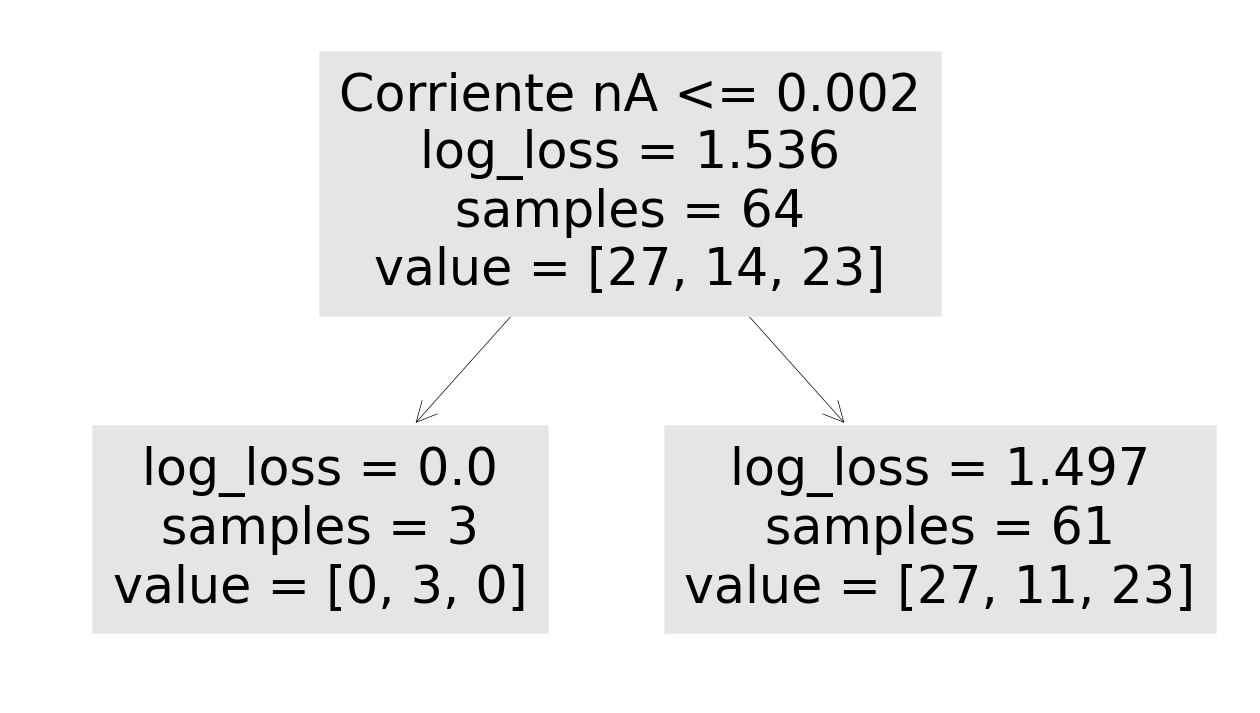

In [ ]:
criterio = ['gini', 'entropy', 'log_loss']
for tipo in criterio:
  arbol = tree.DecisionTreeClassifier(criterion = tipo, max_depth= 1).fit(X_train, y_train)
  tree.plot_tree(arbol, feature_names = ["Voltaje  ", "Corriente nA"])
  print("-------------------------------------------")
  print("Arbol realizado con el criterio: ", tipo)
  print(f"Acurracy de entrenamiento: {arbol.score(X_train, y_train)}")
  print(f"Acurracy de test:{arbol.score(X_test, y_test)}")
  print(classification_report(y_test, pred))
  print("-------------------------------------------")

## KNN

In [ ]:
n_neighbors = [2,3,4,5,6]

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  print("-------------------------------------------")
  print(f"Metricas para {i} vecinos")
  print(f"Acurracy de entrenamiento: {knn.score(X_train, y_train)}")
  print(f"Acurracy de test: {knn.score(X_test, y_test)}")
  pred = knn.predict(X_test)
  print(classification_report(y_test, pred))
  print("-------------------------------------------")

-------------------------------------------
Metricas para 2 vecinos
Acurracy de entrenamiento: 0.6875
Acurracy de test: 0.47058823529411764
              precision    recall  f1-score   support

         405       0.36      1.00      0.53         4
         436       0.60      0.60      0.60         5
         546       1.00      0.12      0.22         8

    accuracy                           0.47        17
   macro avg       0.65      0.58      0.45        17
weighted avg       0.73      0.47      0.41        17

-------------------------------------------
-------------------------------------------
Metricas para 3 vecinos
Acurracy de entrenamiento: 0.65625
Acurracy de test: 0.5882352941176471
              precision    recall  f1-score   support

         405       0.40      1.00      0.57         4
         436       1.00      0.20      0.33         5
         546       0.83      0.62      0.71         8

    accuracy                           0.59        17
   macro avg       0.74

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
algoritmo = ['auto', 'ball_tree', 'kd_tree', 'brute']
for algor in algoritmo:
  knn = KNeighborsClassifier(n_neighbors = 3, algorithm = algor)
  knn.fit(X_train, y_train)
  print("-------------------------------------------")
  print(f"Metricas para 3 vecinos usando el algoritmo: ", algor)
  print(f"Acurracy de entrenamiento: {knn.score(X_train, y_train)}")
  print(f"Acurracy de test: {knn.score(X_test, y_test)}")
  pred = knn.predict(X_test)
  print(classification_report(y_test, pred))
  print("-------------------------------------------")

-------------------------------------------
Metricas para 3 vecinos usando el algoritmo:  auto
Acurracy de entrenamiento: 0.65625
Acurracy de test: 0.5882352941176471
              precision    recall  f1-score   support

         405       0.40      1.00      0.57         4
         436       1.00      0.20      0.33         5
         546       0.83      0.62      0.71         8

    accuracy                           0.59        17
   macro avg       0.74      0.61      0.54        17
weighted avg       0.78      0.59      0.57        17

-------------------------------------------
-------------------------------------------
Metricas para 3 vecinos usando el algoritmo:  ball_tree
Acurracy de entrenamiento: 0.65625
Acurracy de test: 0.5882352941176471
              precision    recall  f1-score   support

         405       0.40      1.00      0.57         4
         436       1.00      0.20      0.33         5
         546       0.83      0.62      0.71         8

    accuracy      

## SVM

In [ ]:
from sklearn.svm import SVC
tipo=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in tipo:
  modelo = SVC(kernel=kernel).fit(X_train, y_train)
  print("-------------------------------------------")
  print("Modelo con el kernel: ", kernel)
  print(f"Acurracy de entrenamiento: {modelo.score(X_train, y_train)}")
  print(f"Acurracy de test: {modelo.score(X_test, y_test)}")
  pred = modelo.predict(X_test)
  print(classification_report(y_test, pred))
  print("-------------------------------------------")

-------------------------------------------
Modelo con el kernel:  linear
Acurracy de entrenamiento: 0.46875
Acurracy de test: 0.29411764705882354
              precision    recall  f1-score   support

         405       0.27      1.00      0.42         4
         436       0.00      0.00      0.00         5
         546       0.50      0.12      0.20         8

    accuracy                           0.29        17
   macro avg       0.26      0.38      0.21        17
weighted avg       0.30      0.29      0.19        17

-------------------------------------------
-------------------------------------------
Modelo con el kernel:  poly
Acurracy de entrenamiento: 0.484375
Acurracy de test: 0.35294117647058826
              precision    recall  f1-score   support

         405       0.31      1.00      0.47         4
         436       0.00      0.00      0.00         5
         546       0.50      0.25      0.33         8

    accuracy                           0.35        17
   macro a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Modelos con Sobremuestreo
---

## Regresión Logística

In [ ]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for sol in solver:
  modelo = LogisticRegression(solver = sol).fit(X_train_over, y_train_over)
  pred = modelo.predict(X_test_over)

  print("-------------------------------------------")
  print("Modelo con el solver: ", sol)
  print(f"Acurracy de entrenamiento: {modelo.score(X_train_over, y_train_over)}")
  print(f"Acurracy de test:{modelo.score(X_test_over, y_test_over)}")
  print(classification_report(y_test_over, pred))
  print("-------------------------------------------")

-------------------------------------------
Modelo con el solver:  lbfgs
Acurracy de entrenamiento: 0.4189189189189189
Acurracy de test:0.21052631578947367
              precision    recall  f1-score   support

         405       0.21      0.75      0.33         4
         436       0.20      0.14      0.17         7
         546       0.00      0.00      0.00         8

    accuracy                           0.21        19
   macro avg       0.14      0.30      0.17        19
weighted avg       0.12      0.21      0.13        19

-------------------------------------------
-------------------------------------------
Modelo con el solver:  liblinear
Acurracy de entrenamiento: 0.43243243243243246
Acurracy de test:0.21052631578947367
              precision    recall  f1-score   support

         405       0.21      0.75      0.33         4
         436       0.20      0.14      0.17         7
         546       0.00      0.00      0.00         8

    accuracy                           0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Árbol de Decisión

-------------------------------------------
Arbol realizado con el criterio:  gini
Acurracy de entrenamiento: 0.4594594594594595
Acurracy de test:0.15789473684210525
              precision    recall  f1-score   support

         405       0.21      0.75      0.33         4
         436       0.20      0.14      0.17         7
         546       0.00      0.00      0.00         8

    accuracy                           0.21        19
   macro avg       0.14      0.30      0.17        19
weighted avg       0.12      0.21      0.13        19

-------------------------------------------
-------------------------------------------
Arbol realizado con el criterio:  entropy
Acurracy de entrenamiento: 0.4594594594594595
Acurracy de test:0.15789473684210525
              precision    recall  f1-score   support

         405       0.21      0.75      0.33         4
         436       0.20      0.14      0.17         7
         546       0.00      0.00      0.00         8

    accuracy          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

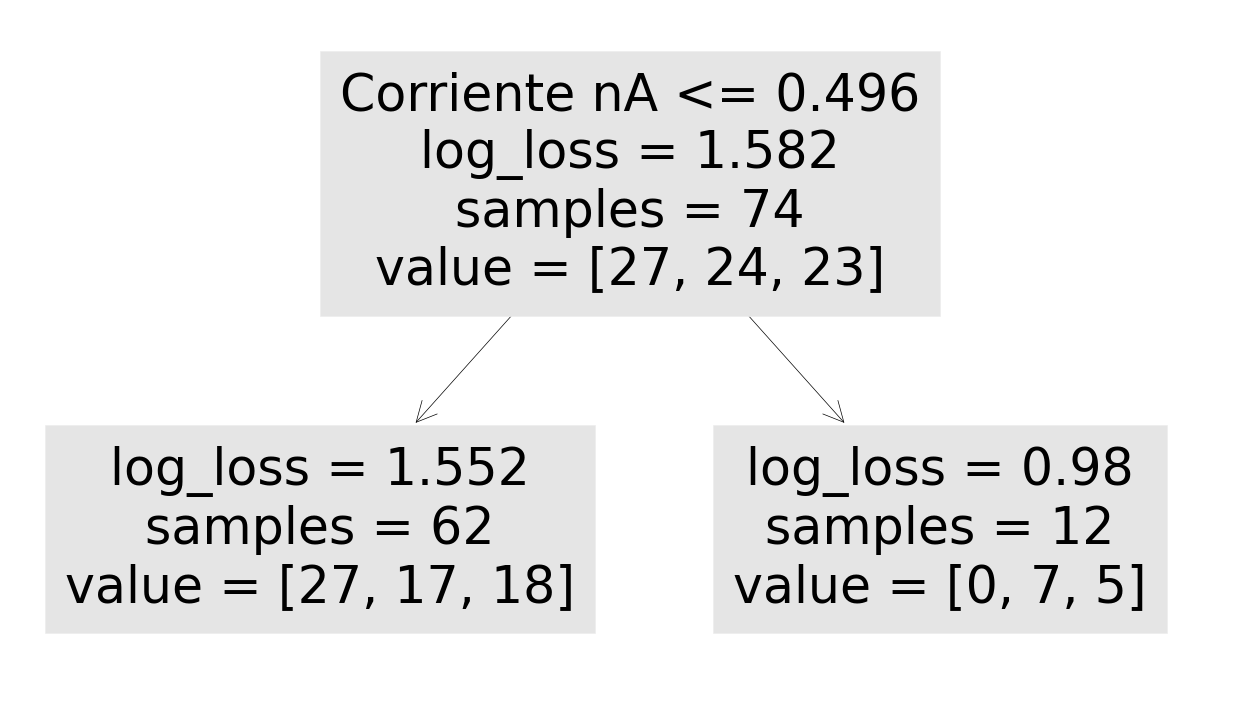

In [ ]:
criterio=['gini', 'entropy', 'log_loss']
for tipo in criterio:
  arbol = tree.DecisionTreeClassifier(criterion = tipo, max_depth= 1).fit(X_train_over,y_train_over)
  tree.plot_tree(arbol, feature_names= ["Voltaje  ","Corriente nA"])
  print("-------------------------------------------")
  print("Arbol realizado con el criterio: ", tipo)
  print(f"Acurracy de entrenamiento: {arbol.score(X_train_over,y_train_over)}")
  print(f"Acurracy de test:{arbol.score(X_test_over,y_test_over)}")
  print(classification_report(y_test_over,pred))
  print("-------------------------------------------")

## KNN

In [ ]:
n_neighbors = [2,3,4,5,6]

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_over, y_train_over)
  print("-------------------------------------------")
  print(f"Metricas para {i} vecinos")
  print(f"Acurracy de entrenamiento: {knn.score(X_train_over, y_train_over)}")
  print(f"Acurracy de test: {knn.score(X_test_over, y_test_over)}")
  pred = knn.predict(X_test_over)
  print(classification_report(y_test_over, pred))
  print("-------------------------------------------")

-------------------------------------------
Metricas para 2 vecinos
Acurracy de entrenamiento: 0.7567567567567568
Acurracy de test: 0.47368421052631576
              precision    recall  f1-score   support

         405       0.29      0.50      0.36         4
         436       0.50      0.71      0.59         7
         546       1.00      0.25      0.40         8

    accuracy                           0.47        19
   macro avg       0.60      0.49      0.45        19
weighted avg       0.67      0.47      0.46        19

-------------------------------------------
-------------------------------------------
Metricas para 3 vecinos
Acurracy de entrenamiento: 0.7162162162162162
Acurracy de test: 0.631578947368421
              precision    recall  f1-score   support

         405       0.40      0.50      0.44         4
         436       0.56      0.71      0.63         7
         546       1.00      0.62      0.77         8

    accuracy                           0.63        19
 

In [ ]:
algoritmo = ['auto', 'ball_tree', 'kd_tree', 'brute']
for algor in algoritmo:
  knn = KNeighborsClassifier(n_neighbors = 3, algorithm = algor)
  knn.fit(X_train_over, y_train_over)
  print("-------------------------------------------")
  print(f"Metricas para 3 vecinos usando el algoritmo: ", algor)
  print(f"Acurracy de entrenamiento: {knn.score(X_train_over, y_train_over)}")
  print(f"Acurracy de test: {knn.score(X_test_over, y_test_over)}")
  pred = knn.predict(X_test_over)
  print(classification_report(y_test_over, pred))
  print("-------------------------------------------")

-------------------------------------------
Metricas para 3 vecinos usando el algoritmo:  auto
Acurracy de entrenamiento: 0.7162162162162162
Acurracy de test: 0.631578947368421
              precision    recall  f1-score   support

         405       0.40      0.50      0.44         4
         436       0.56      0.71      0.63         7
         546       1.00      0.62      0.77         8

    accuracy                           0.63        19
   macro avg       0.65      0.61      0.61        19
weighted avg       0.71      0.63      0.65        19

-------------------------------------------
-------------------------------------------
Metricas para 3 vecinos usando el algoritmo:  ball_tree
Acurracy de entrenamiento: 0.7162162162162162
Acurracy de test: 0.631578947368421
              precision    recall  f1-score   support

         405       0.40      0.50      0.44         4
         436       0.56      0.71      0.63         7
         546       1.00      0.62      0.77         8

## SVM

In [ ]:
from sklearn.svm import SVC
tipo = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in tipo:
  modelo = SVC(kernel = kernel).fit(X_train_over, y_train_over)
  print("-------------------------------------------")
  print("Modelo con el kernel: ", kernel)
  print(f"Acurracy de entrenamiento: {modelo.score(X_train_over, y_train_over)}")
  print(f"Acurracy de test: {modelo.score(X_test_over, y_test_over)}")
  pred = modelo.predict(X_test_over)
  print(classification_report(y_test_over, pred))
  print("-------------------------------------------")

-------------------------------------------
Modelo con el kernel:  linear
Acurracy de entrenamiento: 0.44594594594594594
Acurracy de test: 0.21052631578947367
              precision    recall  f1-score   support

         405       0.21      0.75      0.33         4
         436       0.20      0.14      0.17         7
         546       0.00      0.00      0.00         8

    accuracy                           0.21        19
   macro avg       0.14      0.30      0.17        19
weighted avg       0.12      0.21      0.13        19

-------------------------------------------
-------------------------------------------
Modelo con el kernel:  poly
Acurracy de entrenamiento: 0.47297297297297297
Acurracy de test: 0.15789473684210525
              precision    recall  f1-score   support

         405       0.19      0.75      0.30         4
         436       0.00      0.00      0.00         7
         546       0.00      0.00      0.00         8

    accuracy                           0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Modelos con Submuestreo
---

## Regresión Logística



In [ ]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for sol in solver:
  modelo = LogisticRegression(solver=sol).fit(X_train_under, y_train_under)
  pred = modelo.predict(X_test_under)

  print("-------------------------------------------")
  print("Modelo con el solver: ", sol)
  print(f"Acurracy de entrenamiento: {modelo.score(X_train_under, y_train_under)}")
  print(f"Acurracy de test:{modelo.score(X_test_under, y_test_under)}")
  print(classification_report(y_test_under, pred))
  print("-------------------------------------------")

-------------------------------------------
Modelo con el solver:  lbfgs
Acurracy de entrenamiento: 0.37777777777777777
Acurracy de test:0.25
              precision    recall  f1-score   support

         405       0.33      0.40      0.36         5
         436       0.00      0.00      0.00         4
         546       0.17      0.33      0.22         3

    accuracy                           0.25        12
   macro avg       0.17      0.24      0.20        12
weighted avg       0.18      0.25      0.21        12

-------------------------------------------
-------------------------------------------
Modelo con el solver:  liblinear
Acurracy de entrenamiento: 0.37777777777777777
Acurracy de test:0.25
              precision    recall  f1-score   support

         405       0.33      0.40      0.36         5
         436       0.00      0.00      0.00         4
         546       0.17      0.33      0.22         3

    accuracy                           0.25        12
   macro avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Árbol de Decisión

-------------------------------------------
Arbol realizado con el criterio:  gini
Acurracy de entrenamiento: 0.4444444444444444
Acurracy de test:0.25
              precision    recall  f1-score   support

         405       0.33      0.40      0.36         5
         436       0.00      0.00      0.00         4
         546       0.17      0.33      0.22         3

    accuracy                           0.25        12
   macro avg       0.17      0.24      0.20        12
weighted avg       0.18      0.25      0.21        12

-------------------------------------------
-------------------------------------------
Arbol realizado con el criterio:  entropy
Acurracy de entrenamiento: 0.4444444444444444
Acurracy de test:0.25
              precision    recall  f1-score   support

         405       0.33      0.40      0.36         5
         436       0.00      0.00      0.00         4
         546       0.17      0.33      0.22         3

    accuracy                           0.25        1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

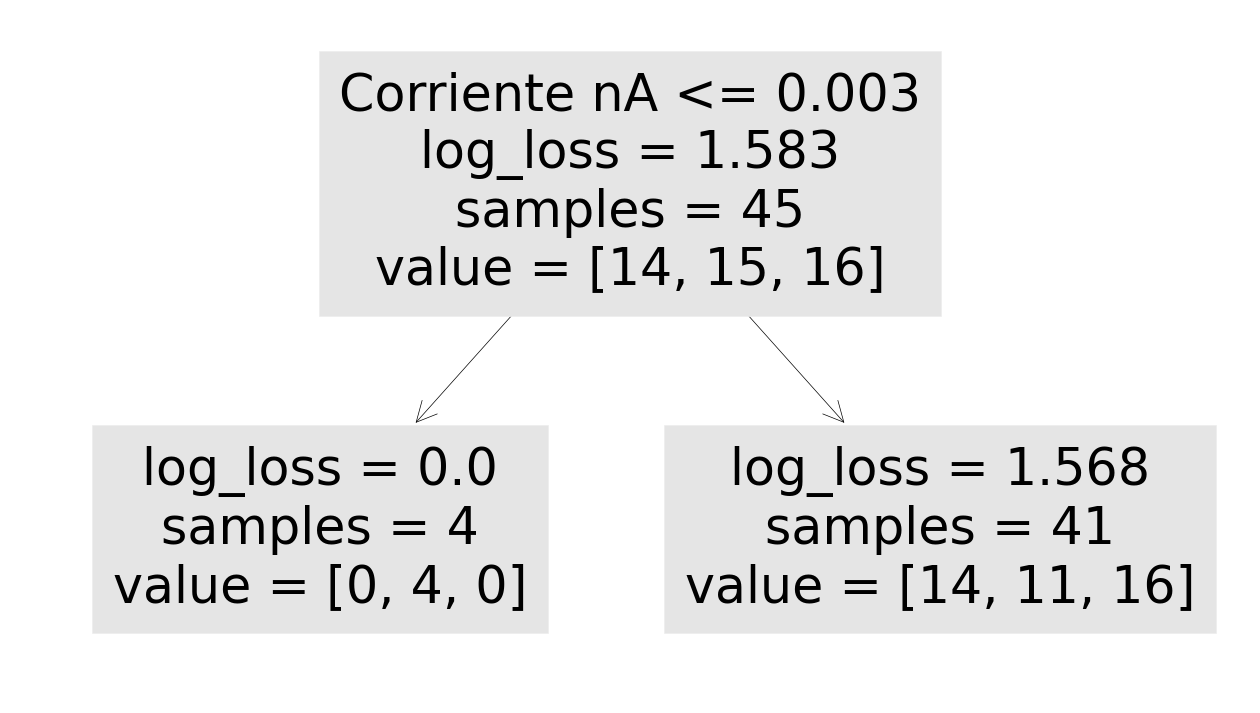

In [ ]:
criterio=['gini', 'entropy', 'log_loss']
for tipo in criterio:
  arbol = tree.DecisionTreeClassifier(criterion = tipo, max_depth= 1).fit(X_train_under, y_train_under)
  tree.plot_tree(arbol, feature_names= ["Voltaje  ","Corriente nA"])
  print("-------------------------------------------")
  print("Arbol realizado con el criterio: ", tipo)
  print(f"Acurracy de entrenamiento: {arbol.score(X_train_under, y_train_under)}")
  print(f"Acurracy de test:{arbol.score(X_test_under, y_test_under)}")
  print(classification_report(y_test_under, pred))
  print("-------------------------------------------")

## KNN

In [ ]:
n_neighbors = [2,3,4,5,6]

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_under, y_train_under)
  print("-------------------------------------------")
  print(f"Metricas para {i} vecinos")
  print(f"Acurracy de entrenamiento: {knn.score(X_train_under, y_train_under)}")
  print(f"Acurracy de test: {knn.score(X_test_under, y_test_under)}")
  pred = knn.predict(X_test_under)
  print(classification_report(y_test_under, pred))
  print("-------------------------------------------")

-------------------------------------------
Metricas para 2 vecinos
Acurracy de entrenamiento: 0.7111111111111111
Acurracy de test: 0.5
              precision    recall  f1-score   support

         405       0.50      0.60      0.55         5
         436       0.60      0.75      0.67         4
         546       0.00      0.00      0.00         3

    accuracy                           0.50        12
   macro avg       0.37      0.45      0.40        12
weighted avg       0.41      0.50      0.45        12

-------------------------------------------
-------------------------------------------
Metricas para 3 vecinos
Acurracy de entrenamiento: 0.6444444444444445
Acurracy de test: 0.5
              precision    recall  f1-score   support

         405       0.67      0.40      0.50         5
         436       0.60      0.75      0.67         4
         546       0.25      0.33      0.29         3

    accuracy                           0.50        12
   macro avg       0.51      0.

In [ ]:
algoritmo = ['auto', 'ball_tree', 'kd_tree', 'brute']
for algor in algoritmo:
  knn = KNeighborsClassifier(n_neighbors = 3, algorithm = algor)
  knn.fit(X_train_under, y_train_under)
  print("-------------------------------------------")
  print(f"Metricas para 5 vecinos usando el algoritmo: ", algor)
  print(f"Acurracy de entrenamiento: {knn.score(X_train_under, y_train_under)}")
  print(f"Acurracy de test: {knn.score(X_test_under, y_test_under)}")
  pred = knn.predict(X_test_under)
  print(classification_report(y_test_under, pred))
  print("-------------------------------------------")

-------------------------------------------
Metricas para 5 vecinos usando el algoritmo:  auto
Acurracy de entrenamiento: 0.6444444444444445
Acurracy de test: 0.5
              precision    recall  f1-score   support

         405       0.67      0.40      0.50         5
         436       0.60      0.75      0.67         4
         546       0.25      0.33      0.29         3

    accuracy                           0.50        12
   macro avg       0.51      0.49      0.48        12
weighted avg       0.54      0.50      0.50        12

-------------------------------------------
-------------------------------------------
Metricas para 5 vecinos usando el algoritmo:  ball_tree
Acurracy de entrenamiento: 0.6444444444444445
Acurracy de test: 0.5
              precision    recall  f1-score   support

         405       0.67      0.40      0.50         5
         436       0.60      0.75      0.67         4
         546       0.25      0.33      0.29         3

    accuracy              

## SVM

In [ ]:
from sklearn.svm import SVC
tipo = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in tipo:
  modelo = SVC(kernel = kernel).fit(X_train_under, y_train_under)
  print("-------------------------------------------")
  print("Modelo con el kernel: ", kernel)
  print(f"Acurracy de entrenamiento: {modelo.score(X_train_under, y_train_under)}")
  print(f"Acurracy de test: {modelo.score(X_test_under, y_test_under)}")
  pred = modelo.predict(X_test_under)
  print(classification_report(y_test_under, pred))
  print("-------------------------------------------")

-------------------------------------------
Modelo con el kernel:  linear
Acurracy de entrenamiento: 0.35555555555555557
Acurracy de test: 0.25
              precision    recall  f1-score   support

         405       0.00      0.00      0.00         5
         436       0.00      0.00      0.00         4
         546       0.25      1.00      0.40         3

    accuracy                           0.25        12
   macro avg       0.08      0.33      0.13        12
weighted avg       0.06      0.25      0.10        12

-------------------------------------------
-------------------------------------------
Modelo con el kernel:  poly
Acurracy de entrenamiento: 0.4444444444444444
Acurracy de test: 0.3333333333333333
              precision    recall  f1-score   support

         405       0.36      0.80      0.50         5
         436       0.00      0.00      0.00         4
         546       0.00      0.00      0.00         3

    accuracy                           0.33        12
   m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Modelos con Cross-Validation
---

## Regresión Logísitica

In [ ]:
modelo = LogisticRegression()

cv_puntajes = cross_val_score(modelo, X_train, y_train, cv = cv)

cv_predicciones = cross_val_predict(modelo, X_test, y_test, cv = cv)

print(f"Acuracy promedio = {cv_puntajes.mean()}")

Acuracy promedio = 0.4397435897435898


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


##Árbol de decisión

In [ ]:
criterio = ['gini', 'entropy', 'log_loss']
for tipo in criterio:
  print("------------------------------------------")
  print("Accuracy con: ", tipo)
  modelo = tree.DecisionTreeClassifier(criterion = tipo, max_depth = 1).fit(X_train_under, y_train_under)
  cv_puntajes = cross_val_score(modelo,X_train, y_train, cv = cv)
  cv_predicciones = cross_val_predict(modelo, X_test, y_test, cv = cv)
  print(f"Accuracy promedio= {cv_puntajes.mean()}")
  print("-----------------------------------------")

------------------------------------------
Accuracy con:  gini
Accuracy promedio= 0.4064102564102564
-----------------------------------------
------------------------------------------
Accuracy con:  entropy
Accuracy promedio= 0.4064102564102564
-----------------------------------------
------------------------------------------
Accuracy con:  log_loss
Accuracy promedio= 0.4064102564102564
-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## KNN

In [ ]:
algoritmo = ['auto', 'ball_tree', 'kd_tree', 'brute']
for algor in algoritmo:
  print("---------------------------------------------")
  modelo = KNeighborsClassifier(n_neighbors = 6, algorithm = algor)
  print("Accuracy con: ", algor)
  cv_puntajes = cross_val_score(modelo, X_train, y_train, cv = cv)
  cv_predicciones = cross_val_predict(modelo, X_test, y_test,cv = cv)
  print(f"Accuracy promedio= {cv_puntajes.mean()}")
  print("---------------------------------------------")

---------------------------------------------
Accuracy con:  auto


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy promedio= 0.4371794871794871
---------------------------------------------
---------------------------------------------
Accuracy con:  ball_tree


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy promedio= 0.4371794871794871
---------------------------------------------
---------------------------------------------
Accuracy con:  kd_tree
Accuracy promedio= 0.4371794871794871
---------------------------------------------
---------------------------------------------
Accuracy con:  brute
Accuracy promedio= 0.4371794871794871
---------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## SVM

In [ ]:
tipo = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in tipo:
  print("-------------------------------------------")
  modelo = SVC(kernel = kernel)
  print("Accuracy con: ", kernel)
  cv_puntajes = cross_val_score(modelo, X_train, y_train, cv = cv)
  cv_predicciones = cross_val_predict(modelo, X_test, y_test, cv = cv)
  print(f"Accuracy promedio= {cv_puntajes.mean()}")
  print("-------------------------------------------")

-------------------------------------------
Accuracy con:  linear
Accuracy promedio= 0.3910256410256411

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



-------------------------------------------
-------------------------------------------
Accuracy con:  poly
Accuracy promedio= 0.4705128205128206
-------------------------------------------
-------------------------------------------
Accuracy con:  rbf
Accuracy promedio= 0.4384615384615385
-------------------------------------------
-------------------------------------------
Accuracy con:  sigmoid
Accuracy promedio= 0.4217948717948718
-------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


# Clasificador Naive-Bayes Gaussiano
---

In [ ]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
tot_Test = np.size(y_test)
tot_aciertos = 0
y_pred = []

for x, y in zip(X_test, y_test):
    y_est = clf_NB.predict([x])
    y_pred.append(y_est)
    if (y==y_est): tot_aciertos +=1
    print('Instancia %s Clase real %s - Clase estimada %s \n' %(x, y, y_est))
print('Exactitud del clasificador (porcentaje de aciertos) = %s \n' %(tot_aciertos*100/tot_Test))

Instancia [0.9843919  0.00266464] Clase real 546 - Clase estimada [405] 

Instancia [0.99999415 1.        ] Clase real 546 - Clase estimada [546] 

Instancia [0.98925737 0.00963076] Clase real 546 - Clase estimada [405] 

Instancia [0.99995517 0.84773506] Clase real 436 - Clase estimada [546] 

Instancia [0.9990195  0.61933765] Clase real 546 - Clase estimada [436] 

Instancia [0.98634706 0.01408451] Clase real 546 - Clase estimada [405] 

Instancia [0.99025932 0.01408451] Clase real 546 - Clase estimada [405] 

Instancia [0.99221447 0.06357061] Clase real 405 - Clase estimada [405] 

Instancia [0.99629047 0.46707271] Clase real 546 - Clase estimada [405] 

Instancia [0.99319497 0.01109631] Clase real 546 - Clase estimada [405] 

Instancia [0.98436656 0.        ] Clase real 436 - Clase estimada [405] 

Instancia [0.99807409 0.61933765] Clase real 436 - Clase estimada [436] 

Instancia [0.9949435  0.20060906] Clase real 405 - Clase estimada [405] 

Instancia [0.99609554 0.42900647] Clas